# Data Preparation

## Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
with open('/content/train_preprocess.tsv.txt', 'r') as file:
  #Baca file
  data = file.readlines()

#mengubah ke dalam bentuk dataframe
df = pd.DataFrame(data)
df

,0
0,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...
3,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...
...,...
10995,tidak kecewa\tpositive\n
10996,enak rasa masakan nya apalagi kepiting yang me...
10997,hormati partai-partai yang telah berkoalisi\tn...
10998,"pagi pagi di tol pasteur sudah macet parah , b..."


In [ ]:
#memberi nama kolom
df.rename(columns={0: "content"}, inplace=True)
df


,content
0,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...
3,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...
...,...
10995,tidak kecewa\tpositive\n
10996,enak rasa masakan nya apalagi kepiting yang me...
10997,hormati partai-partai yang telah berkoalisi\tn...
10998,"pagi pagi di tol pasteur sudah macet parah , b..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  11000 non-null  object
dtypes: object(1)
memory usage: 86.1+ KB


In [ ]:
#cek data dengan nilai null/kosong
df.isnull().sum()

content    0
dtype: int64

In [ ]:
#cek data duplicate
df.duplicated().sum()

67

In [ ]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10933 entries, 0 to 10999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10933 non-null  object
dtypes: object(1)
memory usage: 170.8+ KB


In [ ]:
#menampilkan data teratas
df.head()

,content
0,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...
3,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...


In [ ]:
df.head()

,content
0,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...
3,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...


## Labelling dengan NLTK


In [ ]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt


nltk.download('punk')
nltk.download('vader_lexicon')

[nltk_data] Error loading punk: Package 'punk' not found in index
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Inisialisasi objek SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# List untuk menyimpan label dan skor sentimen
labels = []
scores = []

# Iterasi melalui kolom 'stemming_text'
for text in df['content']:
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    scores.append(compound_score)

    if compound_score > 0:
        label = 'positif'
    elif compound_score == 0:
        label = 'netral'
    else:
        label = 'negatif'

    labels.append(label)

# Menambahkan kolom sentimen ke DataFrame
df['sentiment_score'] = scores
df['sentiment'] = labels

# Memilih kolom-kolom yang ingin ditampilkan
selected_columns = ['content', 'sentiment_score', 'sentiment']
df = df[selected_columns]

df.head()

,content,sentiment_score,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,0.5983,positif
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0.0000,netral
2,lokasi strategis di jalan sumatera bandung . t...,0.5574,positif
3,betapa bahagia nya diri ini saat unboxing pake...,0.6351,positif
4,duh . jadi mahasiswa jangan sombong dong . kas...,-0.5719,negatif


In [ ]:
#jumlah sentimen positif dan negatif

count_label = df['sentiment'].value_counts()
count_label

positif    6433
negatif    3427
netral     1073
Name: sentiment, dtype: int64

In [ ]:
label_sentiment = ['Positif','Negatif','Netral']
label_sentiment

['Positif', 'Negatif', 'Netral']

Text(0.5, 0, 'Sentiment')

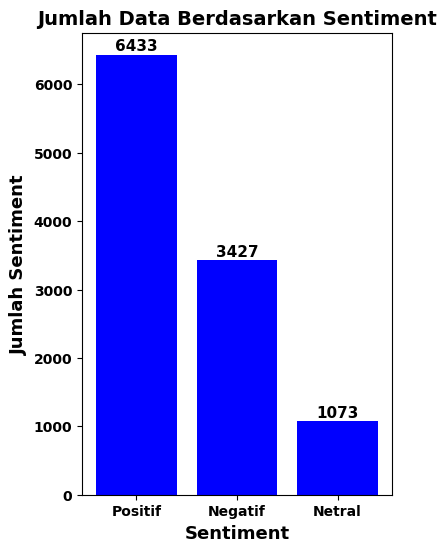

In [ ]:
plt.figure(figsize=(4,6))

visual_label = plt.bar(label_sentiment, count_label, color='blue')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

label_height = 15

for bar, label in zip(visual_label, count_label):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + label_height, label, fontsize=11, fontweight='bold',
           ha='center', va='bottom')

plt.title('Jumlah Data Berdasarkan Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Sentiment', fontsize=13, fontweight='bold')
plt.xlabel('Sentiment', fontsize=13, fontweight='bold')

## Data Preprocessing

In [ ]:
data = df[['content','sentiment']]
data.head()

,content,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral
2,lokasi strategis di jalan sumatera bandung . t...,positif
3,betapa bahagia nya diri ini saat unboxing pake...,positif
4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif


In [ ]:
#import library regex untuk melakukan cleansing data text

import regex as re

In [ ]:
data.value_counts(data['sentiment'])

sentiment
positif    6433
negatif    3427
netral     1073
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10933 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    10933 non-null  object
 1   sentiment  10933 non-null  object
dtypes: object(2)
memory usage: 256.2+ KB


In [ ]:
data.shape

(10933, 2)

In [ ]:
#Cleaning
import re
import string
import nltk

#remove URL
def remove_URL(tweet):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

#Remove Emoji
def remove_emoji(tweet):
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F"
  u"\U0001F300-\U0001F5FF"
  u"\U0001F1E0-\U0001F1FF"
                      "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

#remove html
def remove_html(tweet):
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

# remove numbers
def remove_numbers(tweet):
    numbers = re.sub(r'\d+', '', tweet)
    return numbers

#menghapus symbol
def remove_symbols(tweet):
    symbols = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)  # Menghapus semua karakter yang bukan huruf, angka, atau spasi
    return symbols

#menghapus kata kata random
def remove_random_words(tweet):
    # Menghapus kata-kata yang terlihat seperti urutan karakter acak
    random_words = re.sub(r'\b\w{10,}\b', '', tweet)
    return random_words

data['cleansing'] = data['content'].apply(lambda x: remove_URL(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_emoji(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_html(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_numbers(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_symbols(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_random_words(x))


data.head()

,content,sentiment,cleansing
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus dan k mmbri hujjah partai ap...
2,lokasi strategis di jalan sumatera bandung . t...,positif,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positif,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif,duh jadi mahasiswa jangan sombong dong kasih...


In [ ]:
#mengubah huruf besar ke huruf kecil

def case_folding(cleansing):
    if isinstance(cleansing, str):
        lowercase_text = cleansing.lower()
        return lowercase_text
    else:
        return cleansing


In [ ]:
data['casefolding'] = data['cleansing'].apply(case_folding)
data.head()

,content,sentiment,cleansing,casefolding
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus dan k mmbri hujjah partai ap...,mohon ulama lurus dan k mmbri hujjah partai ap...
2,lokasi strategis di jalan sumatera bandung . t...,positif,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positif,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...


In [ ]:
#melakukan tokenisasi (mengubah suatu kalimat menjadi per kata yang dipisahkan dengan tanda koma)

def tokenize(casefolding):
  tokens = casefolding.split()
  return (tokens)

In [ ]:
data['tokenize'] = data['casefolding'].apply(tokenize)
data.head()

,content,sentiment,cleansing,casefolding,tokenize
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,"[warung, ini, dimiliki, oleh, pengusaha, pabri..."
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus dan k mmbri hujjah partai ap...,mohon ulama lurus dan k mmbri hujjah partai ap...,"[mohon, ulama, lurus, dan, k, mmbri, hujjah, p..."
2,lokasi strategis di jalan sumatera bandung . t...,positif,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,"[lokasi, strategis, di, jalan, sumatera, bandu..."
3,betapa bahagia nya diri ini saat unboxing pake...,positif,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,"[betapa, bahagia, nya, diri, ini, saat, unboxi..."
4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...,"[duh, jadi, mahasiswa, jangan, sombong, dong, ..."


In [ ]:
#filtering dan stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words(['indonesian','english'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopword(tokenize):
  return[word for word in tokenize if word not in stop_words]

data['filtering'] =data['tokenize'].apply(remove_stopword)
data.head()

,content,sentiment,cleansing,casefolding,tokenize,filtering
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,"[warung, ini, dimiliki, oleh, pengusaha, pabri...","[warung, dimiliki, pengusaha, pabrik, yang, pu..."
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus dan k mmbri hujjah partai ap...,mohon ulama lurus dan k mmbri hujjah partai ap...,"[mohon, ulama, lurus, dan, k, mmbri, hujjah, p...","[mohon, ulama, lurus, k, mmbri, hujjah, partai..."
2,lokasi strategis di jalan sumatera bandung . t...,positif,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,"[lokasi, strategis, di, jalan, sumatera, bandu...","[lokasi, strategis, jalan, sumatera, bandung, ..."
3,betapa bahagia nya diri ini saat unboxing pake...,positif,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,"[betapa, bahagia, nya, diri, ini, saat, unboxi...","[betapa, bahagia, nya, unboxing, paket, barang..."
4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...,"[duh, jadi, mahasiswa, jangan, sombong, dong, ...","[duh, mahasiswa, sombong, kasih, kartu, kuning..."


In [ ]:
# #Stemming Data

# !pip install Sastrawi
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from nltk.stem import PorterStemmer
# from nltk.stem.snowball import SnowballStemmer

In [ ]:
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# def stem_text(filtering):
#   return[stemmer.stem(word) for word in filtering]

# data['stemming_data'] = data['filtering'].apply(lambda x: ' '.join(stem_text(x)))
# data.head()

In [ ]:
# data.to_csv('challange_platinum_nn.csv')


In [ ]:
# data.to_excel('challange_platinum_nn.xlsx')

In [ ]:
data = pd.read_csv('/content/challange_platinum_nn.csv')
data.head()

,Unnamed: 0,content,sentiment,cleansing,casefolding,tokenize,filtering,stemming_data
0,0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...,"['warung', 'ini', 'dimiliki', 'oleh', 'pengusa...","['warung', 'dimiliki', 'pengusaha', 'pabrik', ...",warung milik usaha pabrik yang puluh kenal put...
1,1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus dan k mmbri hujjah partai ap...,mohon ulama lurus dan k mmbri hujjah partai ap...,"['mohon', 'ulama', 'lurus', 'dan', 'k', 'mmbri...","['mohon', 'ulama', 'lurus', 'k', 'mmbri', 'huj...",mohon ulama lurus k mmbri hujjah partai yang d...
2,2,lokasi strategis di jalan sumatera bandung . t...,positif,lokasi strategis di jalan sumatera bandung te...,lokasi strategis di jalan sumatera bandung te...,"['lokasi', 'strategis', 'di', 'jalan', 'sumate...","['lokasi', 'strategis', 'jalan', 'sumatera', '...",lokasi strategis jalan sumatera bandung nya ny...
3,3,betapa bahagia nya diri ini saat unboxing pake...,positif,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...,"['betapa', 'bahagia', 'nya', 'diri', 'ini', 's...","['betapa', 'bahagia', 'nya', 'unboxing', 'pake...",betapa bahagia nya unboxing paket barang nya b...
4,4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif,duh jadi mahasiswa jangan sombong dong kasih...,duh jadi mahasiswa jangan sombong dong kasih...,"['duh', 'jadi', 'mahasiswa', 'jangan', 'sombon...","['duh', 'mahasiswa', 'sombong', 'kasih', 'kart...",duh mahasiswa sombong kasih kartu kuning ajar ...


In [ ]:
data.shape

(10933, 8)

In [ ]:
df = data[['content','sentiment','stemming_data']]
df.head(2)

,content,sentiment,stemming_data
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung milik usaha pabrik yang puluh kenal put...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus k mmbri hujjah partai yang d...


In [ ]:
df = df.rename(columns={'sentiment':'label','stemming_data':'content_clean'})
df.head()

,content,label,content_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung milik usaha pabrik yang puluh kenal put...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus k mmbri hujjah partai yang d...
2,lokasi strategis di jalan sumatera bandung . t...,positif,lokasi strategis jalan sumatera bandung nya ny...
3,betapa bahagia nya diri ini saat unboxing pake...,positif,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif,duh mahasiswa sombong kasih kartu kuning ajar ...


In [ ]:
df.label.value_counts()

positif    6433
negatif    3427
netral     1073
Name: label, dtype: int64

# Feature Extraction

Menggunakan TF-IDF (Term Frequency - Inverse Document Frequency) sebagai Feature Extraction dikarnakan Feature Extraction ini akan memeriksa corpus atau kata yang ada didalam dokumen.

In [ ]:
df.head(2)

,content,label,content_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung milik usaha pabrik yang puluh kenal put...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus k mmbri hujjah partai yang d...


In [ ]:
data_preprocessed = df['content_clean'].tolist()
print(data_preprocessed)

['warung milik usaha pabrik yang puluh kenal putih bandung padu ahli masak padu warung yang menu utama bahan tambah menu ayam selera indonesia harga lewat bletoka nya kalah yang asli tegal positive', 'mohon ulama lurus k mmbri hujjah partai yang diwlh suara islam neutral', 'lokasi strategis jalan sumatera bandung nya nyaman sofa lantai paella nya enak pas makan minum bir dingin appetiser nya enakenak positive', 'betapa bahagia nya unboxing paket barang nya bagus beli positive', 'duh mahasiswa sombong kasih kartu kuning ajar yang usah ikutikut politik selesai kuliah nya politik telat dasar mahasiswa negative', 'makan agam harga makan food stall kasir suasana ramai perhati parkir duduk positive', 'pakai kartu kredit bca untung rugi negative', 'unik bagus foto makan enak pegawai ramah bersih luas wifi kencang harga standar sesuai nya menu masakan makan barat indonesia menu favorit lychee mojito spagheti positive', 'keluarga nikmat kuliner yang rm sari sunda jalan bandung hubung rm sari su

In [ ]:
#Import Library TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
tfidf_vec.fit(data_preprocessed)

#transform data yang telah di hitung menggunakan TF-IDF menjadi sebuah matrix
X_tfidf = tfidf_vec.fit_transform(data_preprocessed)
print('Feature Extraction TF-IDF Telah Selesai')

Feature Extraction TF-IDF Telah Selesai


In [ ]:
import pickle
pickle.dump(tfidf_vec, open('tfidf_vect.p','wb'))
print("tfidf_vect.pickle has created!")

tfidf_vect.pickle has created!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)

print("Feature Extraction telah selesai sob !!!")

Feature Extraction telah selesai sob !!!


In [ ]:
print(X)

  (0, 127)	1
  (0, 564)	1
  (0, 660)	1
  (0, 717)	1
  (0, 812)	1
  (0, 1277)	1
  (0, 3749)	1
  (0, 4132)	1
  (0, 4632)	1
  (0, 4915)	1
  (0, 5691)	1
  (0, 6207)	1
  (0, 6424)	2
  (0, 6515)	1
  (0, 7151)	1
  (0, 7403)	1
  (0, 7427)	2
  (0, 8117)	1
  (0, 8297)	1
  (0, 8333)	1
  (0, 9211)	1
  (0, 10202)	1
  (0, 10347)	1
  (0, 11041)	1
  (0, 11064)	1
  :	:
  (10931, 7622)	1
  (10931, 10687)	1
  (10932, 555)	1
  (10932, 819)	1
  (10932, 871)	1
  (10932, 1032)	1
  (10932, 1103)	1
  (10932, 1123)	1
  (10932, 1179)	1
  (10932, 3136)	1
  (10932, 3137)	1
  (10932, 4553)	1
  (10932, 4645)	1
  (10932, 5390)	1
  (10932, 5726)	1
  (10932, 5875)	1
  (10932, 6017)	3
  (10932, 7151)	3
  (10932, 7932)	2
  (10932, 8117)	1
  (10932, 8673)	1
  (10932, 8705)	1
  (10932, 10602)	1
  (10932, 11464)	3
  (10932, 11495)	1


In [ ]:
import pickle

pickle.dump(count_vect, open('feature_CV_platinum_nn.p', 'wb'))

In [ ]:
from sklearn.model_selection import train_test_split

classes = df.label
classes

0        positif
1         netral
2        positif
3        positif
4        negatif
          ...   
10928     netral
10929    positif
10930    positif
10931    negatif
10932    positif
Name: label, Length: 10933, dtype: object

# Prepare Train and Test Dataset



In [ ]:
#meembagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, classes, test_size = 0.2)

In [ ]:
print("====== TOTAL KESELURUHAN DATA ======")
print(data.value_counts().sum())


print("\n====== Jumlah Data Latih ======")
print(X_train.shape[0])

print("\n====== Jumlah Data Test ======")
print(X_test.shape[0])

# print(X_train.shape[0]+X_test.shape[0])

====== TOTAL KESELURUHAN DATA ======
10933

====== Jumlah Data Latih ======
8746

====== Jumlah Data Test ======
2187


Melakukan training data menggunakan Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)


print('Training telah berhasil sob !!!')

Training telah berhasil sob !!!


In [ ]:
#menyimpan data
pickle.dump(model, open('model_training_nn.p', 'wb'))

# Evaluasi

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

test = model.predict(X_test)

In [ ]:
#Evaluasi Akurasi NN
accuracy = accuracy_score(y_test, test)
print(f"Akurasi: {accuracy:.2f}")

#Evaluasi Classification Report
print("Classification Report Neural Network")
print(classification_report(y_test, test))

#Evaluasi Confusion Matrix
print("Evaluasi Confusion Matrix Neural Network")
print(confusion_matrix(y_test, test))


Akurasi: 0.96
Classification Report Neural Network
              precision    recall  f1-score   support

     negatif       0.97      0.92      0.94       669
      netral       0.92      0.93      0.92       207
     positif       0.96      0.98      0.97      1311

    accuracy                           0.96      2187
   macro avg       0.95      0.94      0.94      2187
weighted avg       0.96      0.96      0.96      2187

Evaluasi Confusion Matrix Neural Network
[[ 613    8   48]
 [   6  192    9]
 [  16    9 1286]]


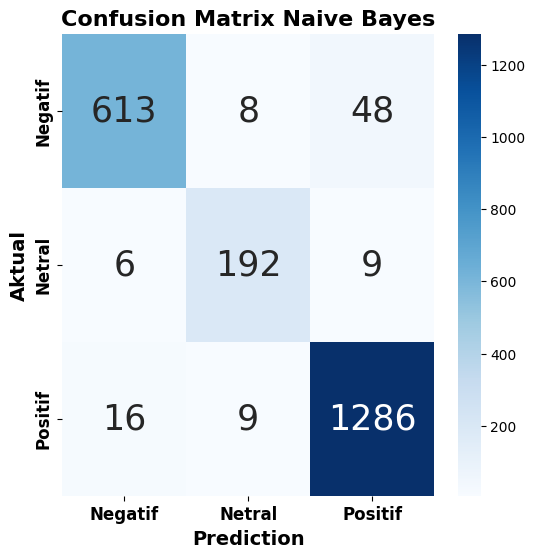

In [ ]:
import seaborn as sns
#membuat model visualisasi

plt.figure(figsize=(6,6))
conf_matrix_NN = confusion_matrix(y_test, test)

#Visualisasi Confusion Matrix menggunakan heatmap
sns.heatmap(conf_matrix_NN,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Negatif','Netral','Positif'],
            yticklabels=['Negatif','Netral','Positif'],
            annot_kws={"size":25})
plt.title("Confusion Matrix Naive Bayes", fontsize=16, fontweight='bold')
plt.ylabel("Aktual", fontweight='bold', fontsize=14)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xlabel('Prediction', fontsize=14, fontweight='bold')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

accuracies = []

y = classes

for iteration, data in enumerate(kf.split(X), start = 1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test   = X[data[1]]
    target_test = y[data[1]]

    clf = MLPClassifier()

    clf.fit(data_train, target_train)

    preds = clf.predict(data_test)

    accuracy = accuracy_score(target_test, preds)

    print('Training ke-', iteration)
    print(classification_report(target_test, preds))
    print('========================================')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print('Rata-rata Accuracy: ', average_accuracy)


Training ke- 1
              precision    recall  f1-score   support

     negatif       0.98      0.97      0.98       697
      netral       0.91      0.96      0.93       200
     positif       0.99      0.98      0.99      1290

    accuracy                           0.98      2187
   macro avg       0.96      0.97      0.97      2187
weighted avg       0.98      0.98      0.98      2187

Training ke- 2
              precision    recall  f1-score   support

     negatif       0.98      0.97      0.98       670
      netral       0.94      0.97      0.95       210
     positif       0.99      0.99      0.99      1307

    accuracy                           0.98      2187
   macro avg       0.97      0.98      0.97      2187
weighted avg       0.98      0.98      0.98      2187

Training ke- 3
              precision    recall  f1-score   support

     negatif       0.99      0.98      0.98       700
      netral       0.95      0.96      0.95       202
     positif       0.99      0

# Predict

In [ ]:
import re

def cleansing(tweet):
    # Remove URL
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)

    # Remove Emoji
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub('', tweet)

    # Remove HTML
    tweet = re.sub(r'<.*?>', '', tweet)

    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)

    # Remove symbols
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)

    # Remove random words
    tweet = re.sub(r'\b\w{10,}\b', '', tweet)

    return tweet


In [ ]:
original_text = '''
Rasa syukur, cukup
'''

text = tfidf_vec.transform([cleansing(original_text)])

result = model.predict(text)[0]
print('Text: ', original_text)
print()
print('Sentiment: ', result)

Text:  
Rasa syukur, cukup


Sentiment:  positif


In [ ]:
df_sort = df[df['label']=='negatif']
df_sort.head()

,content,label,content_clean
4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif,duh mahasiswa sombong kasih kartu kuning ajar ...
6,pakai kartu kredit bca tidak untung malah rugi...,negatif,pakai kartu kredit bca untung rugi negative
10,simcard indosat inaktiv gara-gara lupa isi pul...,negatif,simcard indosat inaktiv garagara lupa isi puls...
11,sifat iri sering muncul pada orang orang yang ...,negatif,sifat iri muncul orang orang yang tuju hidup n...
13,"pengalaman bersama indosat hari ini , semoga t...",negatif,indosat moga langgan layan langgan indosat neg...


In [ ]:
import pickle

# Load model yang telah Anda simpan sebelumnya
model = pickle.load(open('/content/model_training_nn.p', 'rb'))

# Load fitur yang telah Anda simpan sebelumnya
tfidf_vec = pickle.load(open('tfidf_vect.p', 'rb'))

# Teks yang ingin Anda uji
text_to_predict = "simcard indosat inaktiv garagara lupa isi pulsa kabar nya aktif pinda pasca bayar ribet banget"

# Melakukan ekstraksi fitur pada teks yang ingin Anda uji
X_test = tfidf_vec.transform([text_to_predict])

# Melakukan prediksi menggunakan model
prediction = model.predict(X_test)[0]

# Menampilkan hasil prediksi
print(f"Text: {text_to_predict}")
print(f"Predicted Sentiment: {prediction}")


Text: simcard indosat inaktiv garagara lupa isi pulsa kabar nya aktif pinda pasca bayar ribet banget
Predicted Sentiment: negatif


In [ ]:
df.head()

,content,label,content_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positif,warung milik usaha pabrik yang puluh kenal put...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,netral,mohon ulama lurus k mmbri hujjah partai yang d...
2,lokasi strategis di jalan sumatera bandung . t...,positif,lokasi strategis jalan sumatera bandung nya ny...
3,betapa bahagia nya diri ini saat unboxing pake...,positif,betapa bahagia nya unboxing paket barang nya b...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negatif,duh mahasiswa sombong kasih kartu kuning ajar ...
